<a href="https://colab.research.google.com/github/Pondorasti/DS-2.1/blob/main/Slides/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="Images/slide_1_clustering.png" width="700" height="700">


## Learning Outcomes

<img src="Images/slide_2_clustering.png" width="700" height="700">

## Text Vectorization

Question: What is text vectorization?

Answer: **The process to transform text data to numerical vectors**

## Why do we need text vectorization?

Think back to when we learned about **Label Encoding** and **One-Hot Encoding**: We took categories (text) and transformed them into numerical values. 

Text vectorization is similar in that we are taking text and turning it into something a machine can understand and manipulate by translating a word in to a unique vector of numbers. For example, we could associate the unique vector `(0, 1, 0, 1)` to the word `queen`.

### Question: What are some other use cases for text vectorization?

## Use Cases for Text Vectorization

- Count the number of unique words in each sentence (Bag-of-Words, we'll discuss this shortly!)

- Assign weights to each word in the sentence.

- Map each word to a number (dictionary with words as key and numbers as values) and represent each sentences as the sequence of numbers 


## Bag-of-Words Matrix

- Bag-of-Words (BoW) is a matrix where its **rows are sentences** and its **columns are unique words** seen across all of the sentences

### BoW Example

We have the following 4 sentences:

1. This is the first sentence.
1. This one is the second sentence.
1. And this is the third one.
1. Is this the first sentence?

**Question:** Given the above sentances, how many unique words are there?

<!-- Answer: 9 -->

A BoW matrix would look like the following, where `0` means the word does not appear in the sentence, and `1` means the word does appear in the sentence

![bow_matrix](./Images/bag-of-words-matrix.png)

## BoW Worksheet (7 min)

**Complete the following worksheet on your own:**

- Copy [this blank table](https://docs.google.com/presentation/d/1B7v33fPEwblhHYBCSrCvKRBZz776Df4T_t2jcPXt4k8/edit?usp=sharing), and create the BoW matrix for the following sentences:


1. Data Science is the best.
1. Data Science has cool topics.
1. Are these the best topics?
1. Is Data Science the best track?

## BoW in Sklearn

- We can write a function to return a BoW matrix 

- Below, we will see how we can build a BoW matrix by calling [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer#sklearn-feature-extraction-text-countvectorizer) in sklearn

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']


In [5]:
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())


[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


## How do we get unique words?

In [3]:
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


## Activity: Worksheet --> sklearn (7 min)

Use sklearn to take the 4 sentences you used in the worksheet and create the BoW matrix using sklearn

## Clustering

- Clustering is an unsupervised learning method. A **cluster** is a group of data points that are grouped together due to similarities in their features

- This is very often used **because we usually don’t have labeled data**

- **K-Means clustering** is a popular clustering algorithms: it finds a fixed number _(k)_ of clusters in a set of data. 

- The goal of any cluster algorithm is to **find groups (clusters) in the given data**

### Question: What are some use cases of clustering?

## Examples of Clustering

- Cluster movie dataset -> We expect the movies which their genres are similar be clustered in the same group

- News Article Clustering -> We want the News related to science be in the same group, News related to sport be in the same group

## Demo of K-means

In [4]:
from figures import plot_kmeans_interactive

plot_kmeans_interactive()

ModuleNotFoundError: ignored

## K-means algorithm:

Assume the inputs are $s_1$, $s_2$, ..., $s_n$. 

1. Choose a nnumber $K$ arbitrarily.
1. Pick $K$ random points as cluster centers (called centroids)
1. Assign each $s_i$ to nearest cluster by calculating its distance to each centroid
1. Find a new cluster center by taking the average of the assigned points from step 3
1. Repeat Step 3 and 4 until none of the cluster assignments change

## Let's generate a sample dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


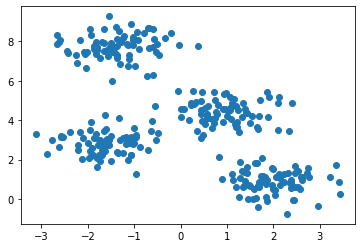

In [6]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [11]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)
km.labels_

[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2], d

## 10-min Break

## How to choose the optimal number (K) of clusters?

We could always choose a high number, but we may be wasting a lot of time and resources when a smaller number would give us the same results. How do we know the best `K` to pick so that we are running k-means as efficiently as possible?

### The Elbow Method

We can find the optimal `K` by utilizing the **Elbow Method:** a method that assigns a score to each `K`. When we plot these scores, we will get a line that looks like an arm bending at the elbow. **The `K` value that is closest to the "elbow" point of the graph is our optimal `K`**

Scores can be calculated two different ways:

1. **Distortion:** the average of the squared distances from each sample to its closest cluster center. Typically, the Euclidean distance metric is used. The lower the distortion, the better the score
    1. For numberes 1 to `k`, compute the following:
        1. Euclidean squared distance formula: $\sum_{j=1}^{k} (a_j-b_j)^2$
        1. For each sample, find the squared distance between the sample and all `k` cluster centers, and then pick the closest center (shortest distance)
        1. Take the average of the above
1. **Inertia:** the sum of squared distances of samples to their closest cluster center. The lower the inertia, the better the score
    1. We'll use the same Euclidean squared distance formula for here as well.

Either scoring method is valid, and will give you the same optimal `K` value. Below we will look at how to implement both scoring methods:


### Distortion

In [17]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

ValueError: ignored

### Inertia

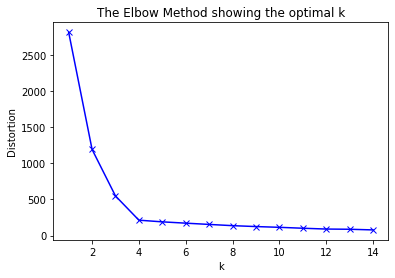

In [12]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Activity - Elbow Method (7 min)

Using the starter code below, prove that 6 is the optimal `K` for clustering the data using k-means using the elbow method. You can use either Distortion or Inertia. 

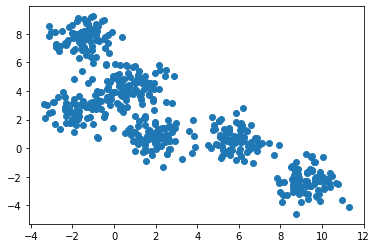

In [13]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

## Activity: Combine Text Vectorization and Clustering the Texts (30 min)

**Complete the activity below in groups of 3**

- We want to cluster the given sentences 

- To do this: We to use both concepts we learned today:

    - Vectorize the sentences (text-vectorization)
    
    - Apply Kmeans to cluster our vectorized sentences

- **Note:** We want to remove stop words from our sentences (and, or, is, etc.). To do this, we add `stop_words='english'` to our call to `CountVectorize`

- **Hint:** Look at the sentences in the starter code. How would you cluster the data if you were doing the clustering? Use that number as your `K` to start with.

### Starter Code

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

### Solution

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# remove stop words from sentences (and, or, is, ...) and instantiate the Bag-of-Word 
vectorizer = CountVectorizer(stop_words='english')
# transform sentences into numerical arrays 
X = vectorizer.fit_transform(sentences)
# print unique words (vocabulary)
print(vectorizer.get_feature_names())
print(X.shape)
# We know there are two group of sentences -> Group 1: cats | Group 2: Google
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)

# Testing our model: For a new sentence, let's see how the model will cluster it. 

# first we should convert the sentence to a numerical array
Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)
# Let's do the same for another sentence
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
# Lets see the model prediction for training docs
print(model.predict(X))

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[0]
[1]
[1 1 0 0 1 1 0 0]


## Other clustering methods and comparison:

http://scikit-learn.org/stable/modules/clustering.html

## Resources:

- https://www.youtube.com/watch?v=FrmrHyOSyhE

- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Summary

- In order to work with text, we should transform sentences into vectors of numbers

- We learned a method for text vectorization -> Bag-of-Words (CountVectorizer)

    - We will learn TFIDF Vectorizer next session
    

- Clustering is an unsupervised learning algorithm that obtains groups based on the geometric positions of features

- K-means is one clustering method that separates the data into `K` number of clusters. The Elbow method can be used to find the optimal `K`

## Optional: Obtain the centers (centriods) of two cluster: which words would be close to the centriods 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
# print('M:')
# print(model.cluster_centers_.argsort())
# print(model.cluster_centers_.argsort()[:, ::-1])
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),


# print("\n")
# print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
# Lets see the model prediction for training docs
print(model.predict(X))

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[0]
[1]
[1 1 0 0 1 1 0 0]
